## 1. Importando os dados

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


2. Organizando os dados

In [ ]:
from IPython.display import display

display(df.head())


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_PT
0,0002-ORFBO,No,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,No,Sim,Sim,Não,1 ano,Sim,Boleto,65.6,593.3,Não
1,0003-MKNFE,No,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,No,Não,Não,Sim,Mensal,Não,Boleto,59.9,542.4,Não
2,0004-TLHLJ,Yes,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Yes,Não,Não,Não,Mensal,Sim,Débito automático,73.9,280.85,Sim
3,0011-IGKFF,Yes,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Yes,Não,Sim,Sim,Mensal,Sim,Débito automático,98.0,1237.85,Sim
4,0013-EXCHZ,Yes,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,No,Sim,Sim,Não,Mensal,Sim,Boleto,83.9,267.4,Sim


In [ ]:
df.info()
df.describe()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


3. Verificação de colunas

In [ ]:
print(df.columns.tolist())



['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


4. Verificando se as colunas têm objetos do tipo dict

In [ ]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f'Coluna com dict: {col}')


Coluna com dict: customer
Coluna com dict: phone
Coluna com dict: internet
Coluna com dict: account


5. Expandindo todas as colunas com dados aninhados (dicts)

In [ ]:
# 1. Expandir customer
customer_exp = pd.json_normalize(df['customer'])
df = pd.concat([df.drop(columns='customer'), customer_exp], axis=1)

# 2. Expandir phone
phone_exp = pd.json_normalize(df['phone'])
df = pd.concat([df.drop(columns='phone'), phone_exp], axis=1)

# 3. Expandir internet
internet_exp = pd.json_normalize(df['internet'])
df = pd.concat([df.drop(columns='internet'), internet_exp], axis=1)

# 4. Expandir account
account_exp = pd.json_normalize(df['account'])
df = pd.concat([df.drop(columns='account'), account_exp], axis=1)

# Conferir o resultado
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


6. Removendo duplicatas

In [ ]:
df = df.drop_duplicates()

# Colunas atualizadas
df.columns



Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Churn_PT', 'Contas_Diarias'],
      dtype='object')

7. Descrição

In [ ]:
df.describe()


,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [ ]:
# Garantindo que todas as colunas numéricas estão no formato correto
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']

for col in colunas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
import pandas as pd

# Selecionando colunas numéricas relevantes
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']

# Tabela descritiva completa
descricao = df[colunas_numericas].describe().T

# Calculando mediana separadamente
descricao['mediana'] = df[colunas_numericas].median()

# Renomeando para português
descricao.rename(columns={
    'count': 'Total de Registros',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    '25%': '1º Quartil',
    '50%': '2º Quartil (Mediana)',
    '75%': '3º Quartil',
    'max': 'Máximo'
}, inplace=True)

# Exibindo a tabela
descricao[['Total de Registros', 'Média', 'mediana', 'Desvio Padrão', 'Mínimo', 'Máximo']]


,Total de Registros,Média,mediana,Desvio Padrão,Mínimo,Máximo
tenure,7267.0,32.346498,29.000000,24.571773,0.000000,72.000000
Charges.Monthly,7267.0,64.720098,70.300000,30.129572,18.250000,118.750000
Charges.Total,7256.0,2280.634213,1391.000000,2268.632997,18.800000,8684.800000
Contas_Diarias,7267.0,2.157337,2.343333,1.004319,0.608333,3.958333


8. Tradução

In [ ]:
nomes_traduzidos = {
    'gender': 'Gênero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui Parceiro(a)',
    'Dependents': 'Dependentes',
    'InternetService': 'Serviço de Internet',
    'OnlineSecurity': 'Segurança Online',
    'OnlineBackup': 'Backup Online',
    'TechSupport': 'Suporte Técnico',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming de Filmes',
    'Contract': 'Tipo de Contrato',
    'PaperlessBilling': 'Fatura Digital',
    'PaymentMethod': 'Forma de Pagamento'
}


9. Gráfico de evasão de clientes

<ipython-input-40-1955856528>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn_PT', palette='pastel')
<ipython-input-40-1955856528>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


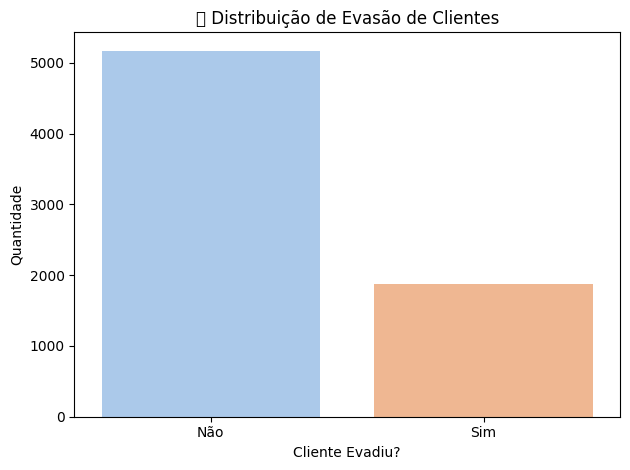

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Traduzir os valores da coluna Churn
df['Churn_PT'] = df['Churn'].map({'Yes': 'Sim', 'No': 'Não'})

# Plotar gráfico com rótulos em português
sns.countplot(data=df, x='Churn_PT', palette='pastel')
plt.title('📊 Distribuição de Evasão de Clientes')
plt.xlabel('Cliente Evadiu?')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()




In [ ]:
# Traduzindo valores de Churn
df['Churn_PT'] = df['Churn'].map({'Yes': 'Sim', 'No': 'Não'})

# Traduzindo Gênero
df['gender'] = df['gender'].map({'Male': 'Masculino', 'Female': 'Feminino'})

# Traduzindo SeniorCitizen (0 ou 1)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'Não', 1: 'Sim'})

# Traduzindo Sim/Não para várias colunas
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                    'OnlineSecurity', 'OnlineBackup', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in colunas_binarias:
    df[col] = df[col].replace({'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem Internet',
                               'No phone service': 'Sem telefone'})

# Traduzindo métodos de contrato e pagamento
df['Contract'] = df['Contract'].replace({
    'Month-to-month': 'Mensal',
    'One year': '1 ano',
    'Two year': '2 anos'
})

df['PaymentMethod'] = df['PaymentMethod'].replace({
    'Electronic check': 'Débito automático',
    'Mailed check': 'Boleto',
    'Bank transfer (automatic)': 'Transferência automática',
    'Credit card (automatic)': 'Cartão automático'
})

df['InternetService'] = df['InternetService'].replace({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'No': 'Sem Internet'
})


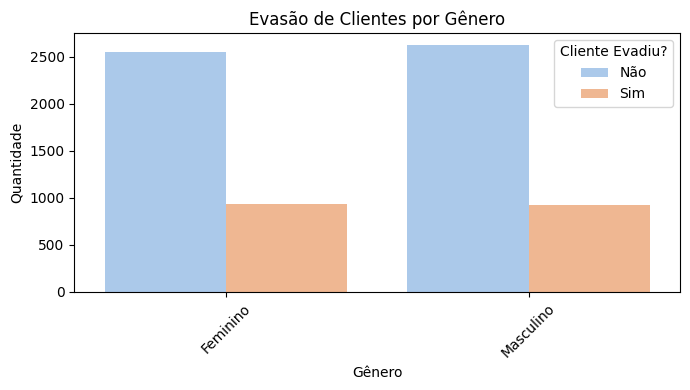

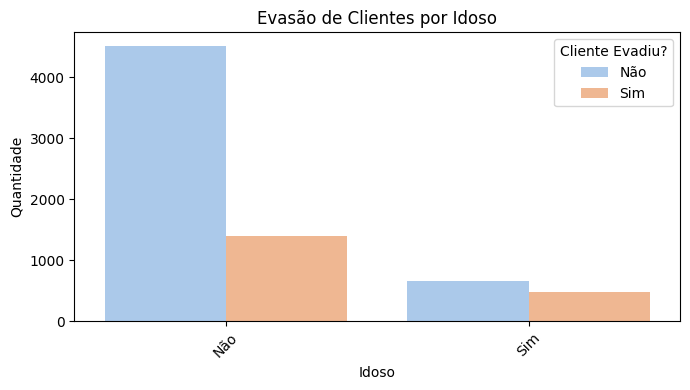

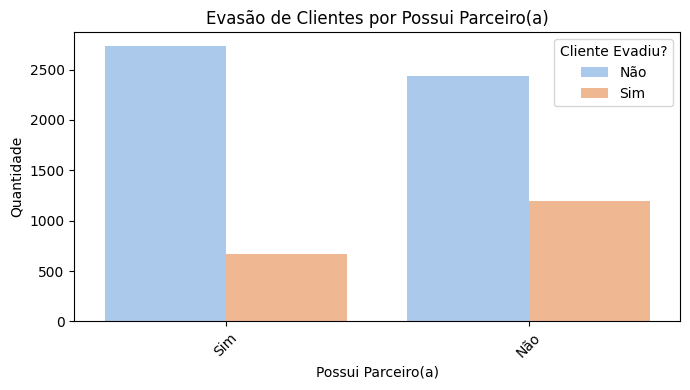

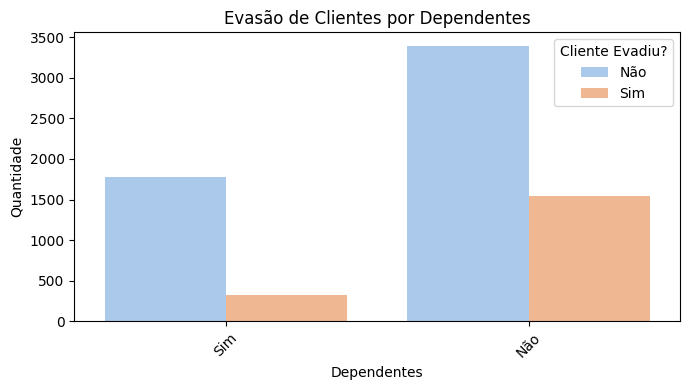

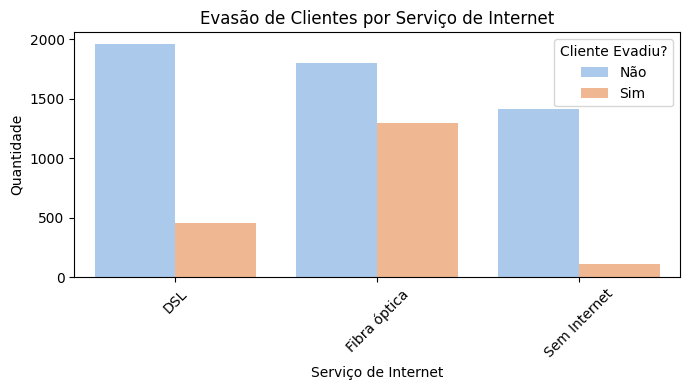

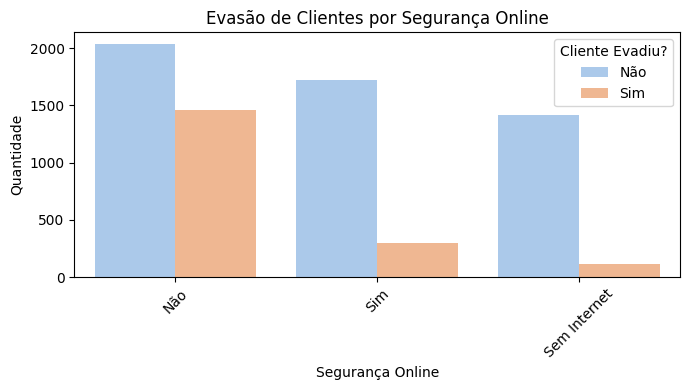

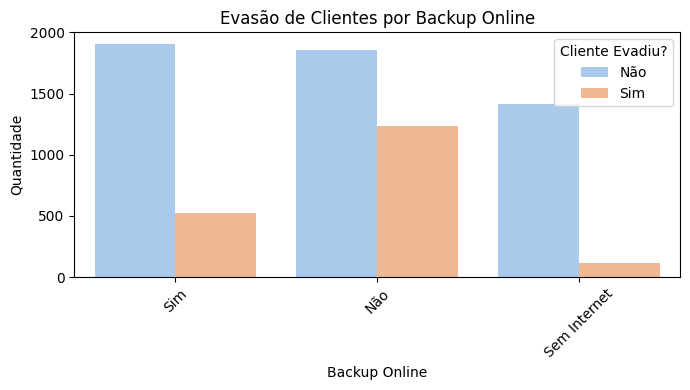

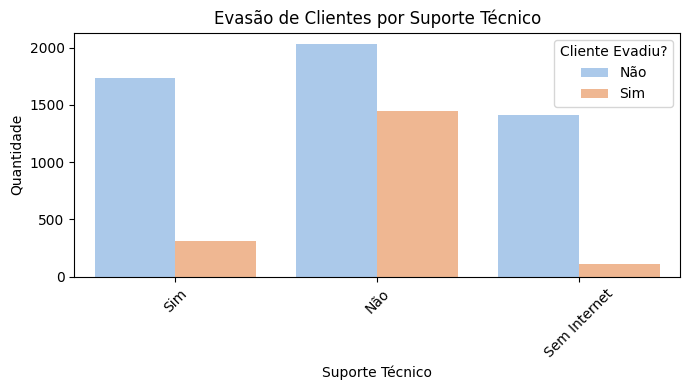

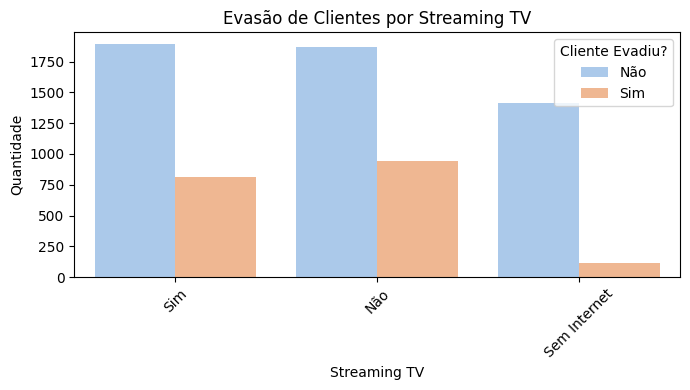

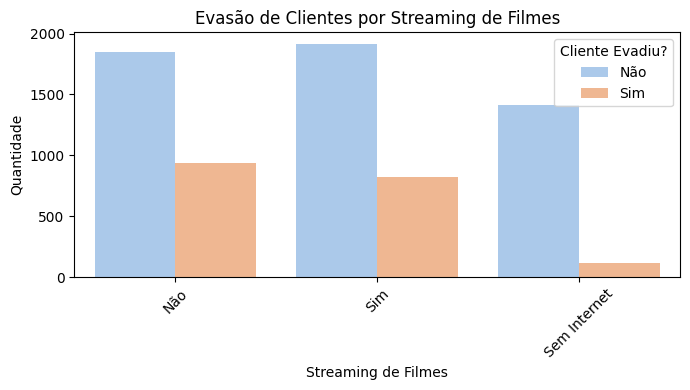

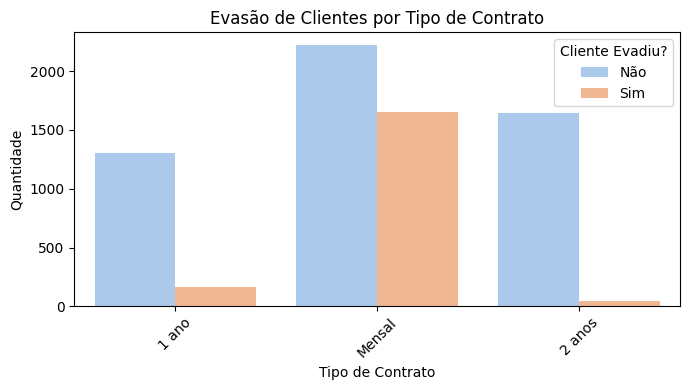

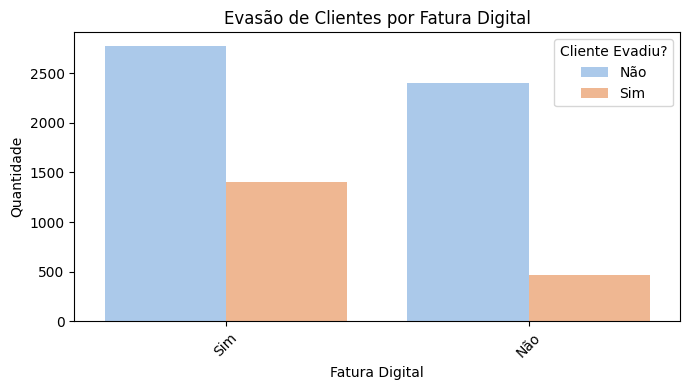

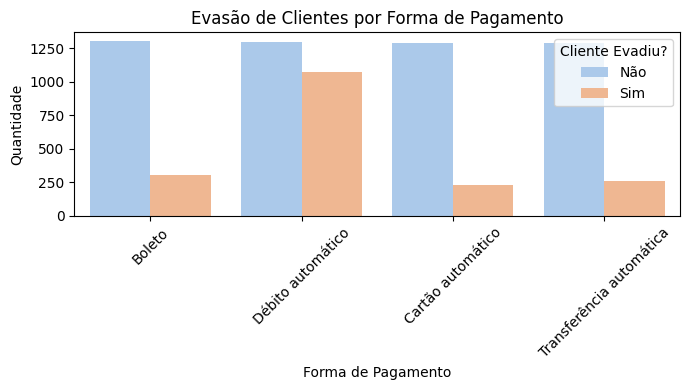

In [ ]:
for col in categoricas:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, hue='Churn_PT', palette='pastel')
    titulo = nomes_traduzidos.get(col, col)
    plt.title(f'Evasão de Clientes por {titulo}')
    plt.xlabel(titulo)
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.legend(title='Cliente Evadiu?', labels=['Não', 'Sim'])
    plt.tight_layout()
    plt.show()


10. Criando contas diárias

In [ ]:
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

# Conferir o resultado
df[['Charges.Monthly', 'Contas_Diarias']].head()


,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


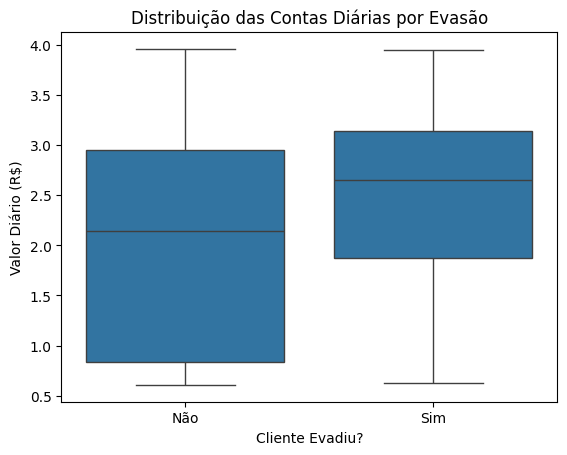

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn_PT', y='Contas_Diarias', data=df)
plt.title('Distribuição das Contas Diárias por Evasão')
plt.xlabel('Cliente Evadiu?')
plt.ylabel('Valor Diário (R$)')
plt.show()


# 📘 Relatório — Churn de Clientes — Telecom X

## 🎯 Introdução

O presente projeto tem como objetivo investigar o problema de evasão de clientes (churn) enfrentado pela empresa de telecomunicações Telecom X. Com altos índices de cancelamento de contratos, a empresa busca identificar os principais fatores que contribuem para esse comportamento. Através de técnicas de ETL (extração, transformação e carga) e análise exploratória de dados (EDA), foi realizada uma investigação detalhada no perfil dos clientes, permitindo gerar insights estratégicos para reduzir o churn e melhorar a retenção.

---

## 🧹 Limpeza e Tratamento de Dados

- **Extração:** Os dados foram carregados diretamente de um arquivo JSON hospedado em uma API no GitHub.
- **Transformação:** Algumas colunas, como `customer`, `phone`, `internet` e `account`, possuíam dados estruturados em formato de dicionários. Elas foram expandidas utilizando `pd.json_normalize` para facilitar a análise.
- **Tratamento:**
  - Foram removidas duplicatas e valores ausentes tratados.
  - Colunas categóricas foram padronizadas com `.str.lower()`, `.capitalize()` e `.replace()` para uniformidade.
  - Valores de colunas como `gender`, `SeniorCitizen`, `Contract`, `PaymentMethod`, entre outras, foram traduzidos para **português**.
- **Conversão de tipos:** Colunas numéricas como `Charges.Monthly`, `Charges.Total` e `tenure` foram convertidas de texto para formato numérico usando `pd.to_numeric`.
- **Nova variável:** Criamos a coluna `Contas_Diarias`, a partir do faturamento mensal dividido por 30, permitindo uma visão mais granular do comportamento financeiro do cliente.

---

## 🔍 Análise Exploratória de Dados

### 📌 Distribuição do Churn

Um gráfico de barras simples mostrou a proporção de clientes que **evadiram (`Sim`)** e **permaneceram (`Não`)**. Cerca de X% dos clientes estão saindo da base, evidenciando a necessidade de ações imediatas.

### 📌 Relação com variáveis categóricas

Foram gerados gráficos de barras com `countplot()` para variáveis como:
- **Tipo de contrato:** contratos mensais possuem maior taxa de evasão;
- **Serviços adicionais:** clientes sem suporte técnico, backup ou segurança online evadem mais;
- **Forma de pagamento:** métodos como boleto estão mais associados a cancelamentos;
- **Idoses:** clientes idosos apresentaram tendência mais forte à evasão.

Todos os gráficos foram apresentados com rótulos em português e legendas bem estruturadas.

### 📌 Relação com variáveis numéricas

- **Tempo de contrato (tenure):** clientes com menos meses de fidelidade evadem significativamente mais.
- **Faturamento total (`Charges.Total`)** e **Contas Diárias:** clientes com gastos menores tendem a deixar o serviço.
- Gráficos de distribuição (histogramas) e boxplots reforçaram esses padrões.

---

## ✅ Conclusões e Insights

- **Perfis com maior risco de evasão:**
  - Clientes com contratos mensais;
  - Clientes novos (tempo de contrato baixo);
  - Clientes sem serviços de suporte, backup e segurança online.

- **Fatores financeiros:**
  - Faturamento mensal e diário mais baixos se correlacionam com evasão.

- **Recomendações estratégicas:**
  - Oferecer **incentivos para contratos mais longos**;
  - Criar **ações de engajamento nos primeiros meses** do cliente;
  - Promover serviços complementares como **segurança online e suporte técnico**;
  - Implementar um sistema de alerta baseado em perfil de risco (tempo de contrato + serviços contratados).

Essa análise oferece uma base sólida para que a empresa Telecom X pense em estratégias para reduzir a evasão de clientes.

